In [3]:
import numpy as np
import pandas as pd
pd.set_option("display.date_dayfirst", True)
pd.set_option("display.date_yearfirst", False)
#pd.describe_option('display.date_yearfirst')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab

import matplotlib.pylab as pylab

import os
cwd = os.getcwd()

Set file to look at containing data

#Import excel file into pandas dataframe

In [4]:
#mainpath = 'C:/Users/mb22/OneDrive/PhD/Quasar Shared/'
#filepath = 'Data/NPL_Table_All.xlsx'
filepath = 'Data to Import/NPL_Table_All.xlsx'

#fullpath=mainpath+filepath
fullpath=cwd+'/'+filepath # use if need to specify full path for some reason.
print(fullpath) #note forward and backward slashes in output

all_data = pd.read_excel(filepath, parse_dates=['Date'])
all_data.head()

C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython/Data to Import/NPL_Table_All.xlsx


,Centre,Postcode,Region,Group,CentreType,Date,Type,Energy,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,Comments
0,Aberdeen Royal Infirmary,AB25 2ZN,A,1,NHS,2007-02-09,MV,6,0.993,0.15,1.005,0.1,0.992,0.4,Measured result (1.003 from tabulated data)
1,Aberdeen Royal Infirmary,AB25 2ZN,A,1,NHS,2007-02-09,MV,15,0.995,0.15,1.008,0.1,0.991,0.4,NaN
2,Aberdeen Royal Infirmary,AB25 2ZN,A,1,NHS,2007-02-10,MeV,4,0.010,0.20,0.998,0.2,1.001,0.4,NaN
3,Aberdeen Royal Infirmary,AB25 2ZN,A,1,NHS,2007-02-10,MeV,6,0.020,0.20,1.003,0.2,1.002,0.4,NaN
4,Aberdeen Royal Infirmary,AB25 2ZN,A,1,NHS,2007-02-10,MeV,9,0.030,0.20,1.003,0.2,1.001,0.4,NaN


#Filter to only contain NHS data

In [5]:
df3 = all_data.copy()
nhs_data = df3[df3['CentreType'].isin(['NHS'])]

nhs_data.tail()

,Centre,Postcode,Region,Group,CentreType,Date,Type,Energy,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,Comments
205,Norfolk and Norwich Hospital,NR4 7UY,H,9,NHS,2010-06-25,MeV,6,0.020,NaN,1.005,0.2,1.005,0.4,Data gained from spreadsheets directly
206,Norfolk and Norwich Hospital,NR4 7UY,H,9,NHS,2010-06-25,MeV,9,0.020,NaN,1.008,0.2,1.001,0.4,Data gained from spreadsheets directly
207,Norfolk and Norwich Hospital,NR4 7UY,H,9,NHS,2010-06-25,MeV,12,-0.070,NaN,0.999,0.2,1.006,0.4,Data gained from spreadsheets directly
208,Norfolk and Norwich Hospital,NR4 7UY,H,9,NHS,2010-06-25,MeV,16,-0.050,NaN,1.000,0.2,1.007,0.4,Data gained from spreadsheets directly
209,Southend,SS0 0RY,H,9,NHS,2000-03-21,MV,6,0.993,0.15,0.996,0.2,0.958,0.4,Looks like a preliminary report


#Calculate some stats & check data types

In [6]:
mean = np.mean(nhs_data) # this needs to be energy specific
sd = np.std(nhs_data)

nhs_data.describe()
#all_data.dtypes

nhs_data.groupby(['Type'])['Energy'].nunique().reset_index() # number of unique dates = number of visits


,Type,Energy
0,MV,9
1,MeV,11
2,kV,18


#Create seperate dataframes for MV, MeV and kV for NHS

In [7]:
#beam_types = all_data.groupby('Type')
#beam_types.mean()

df2 = nhs_data.copy()
mv_data = df2[df2['Type'].isin(['MV'])]
mev_data = df2[df2['Type'].isin(['MeV'])]
kv_data = df2[df2['Type'].isin(['kV'])]

md = mv_data
ed = mev_data
kd = kv_data

df3 = ed.copy()
mev_data_notg5 = df3[~df3['Centre'].str.contains('CPUK')]
mev_data_notg5
#mv_data.describe()
#mev_data.describe()
#kv_data.describe()

,Centre,Postcode,Region,Group,CentreType,Date,Type,Energy,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,Comments
2,Aberdeen Royal Infirmary,AB25 2ZN,A,1,NHS,2007-02-10,MeV,4,0.01,0.2,0.9980,0.2,1.001,0.4,NaN
3,Aberdeen Royal Infirmary,AB25 2ZN,A,1,NHS,2007-02-10,MeV,6,0.02,0.2,1.0030,0.2,1.002,0.4,NaN
4,Aberdeen Royal Infirmary,AB25 2ZN,A,1,NHS,2007-02-10,MeV,9,0.03,0.2,1.0030,0.2,1.001,0.4,NaN
5,Aberdeen Royal Infirmary,AB25 2ZN,A,1,NHS,2007-02-10,MeV,12,0.05,0.2,0.9990,0.2,1.001,0.4,NaN
6,Aberdeen Royal Infirmary,AB25 2ZN,A,1,NHS,2007-02-10,MeV,16,-0.01,0.2,1.0020,0.2,1.002,0.4,NaN
27,Edinburgh Cancer Centre,EH4 2XU,A,1,NHS,2008-10-14,MeV,6,-0.06,0.2,0.9960,0.2,1.003,0.4,NaN
28,Edinburgh Cancer Centre,EH4 2XU,A,1,NHS,2008-10-14,MeV,9,-0.08,0.2,1.0150,0.2,1.003,0.4,NaN
29,Edinburgh Cancer Centre,EH4 2XU,A,1,NHS,2008-10-14,MeV,12,-0.07,0.2,1.0240,0.2,1.013,0.4,NaN
30,Edinburgh Cancer Centre,EH4 2XU,A,1,NHS,2008-10-14,MeV,16,-0.16,0.2,1.0210,0.2,0.994,0.4,NaN
31,Edinburgh Cancer Centre,EH4 2XU,A,1,NHS,2008-10-14,MeV,20,-0.27,0.2,1.0270,0.2,0.996,0.4,NaN


#Make some quick graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05E4F050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x06F21F10>]], dtype=object)

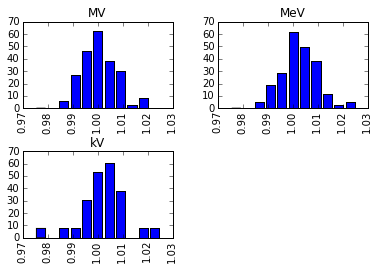

In [8]:
from decimal import * # decimal means that more exact maths can be done with a specified precision.
getcontext().prec = 28
range_lower = Decimal('0.975')
range_upper = Decimal('1.025')
bin_width = Decimal('0.005')
number_bins = (range_upper-range_lower)/bin_width + 1

nhs_data['OPRatio'].hist(by=nhs_data['Type'], normed=True, bins=11, range=(0.975,1.025), rwidth=0.8) #simple auto plot in a grid

#Histograms

##Ideally make into a function and feed data frame, title, filename

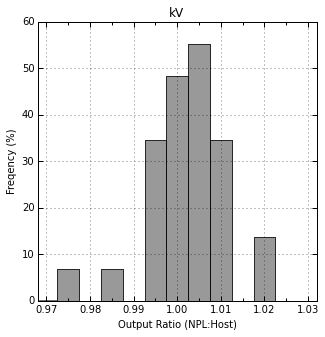

In [9]:
pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('kV')
plt.xlabel("Output Ratio (NPL:Host)")
plt.ylabel("Freqency (%)")
plt.xlim(0.968, 1.032)
plt.ylim(0, 60)

kv_data['OPRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=True,
                               facecolor = 'grey', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = kv_data['OPRatio'].mean()
sd = kv_data['OPRatio'].std()

x = np.linspace(0.9725, 1.0375, 100) # add normal distibution fit
#plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

#plt.savefig('NPL_Paper_Plots/NPL_kV_Hist_NHS.png', bbox_inches='tight', dpi=300)

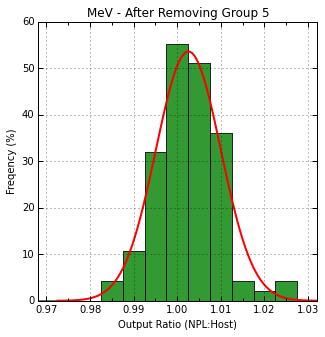

In [10]:
# to take out 'Group 5' MeV Data

pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('MeV - After Removing Group 5')
plt.xlabel("Output Ratio (NPL:Host)")
plt.ylabel("Freqency (%)")
plt.xlim(0.968, 1.032)
plt.ylim(0, 60)

mev_data_notg5['OPRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=True,
                               facecolor = 'green', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = mev_data_notg5['OPRatio'].mean()
sd = mev_data_notg5['OPRatio'].std()

x = np.linspace(0.9725, 1.0375, 100) # add normal distibution fit
plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

#plt.savefig('NPL_Paper_Plots/NPL_MeV_NotG5_Hist_Fit.png', bbox_inches='tight', dpi=300)

#Get some more stats such as Mean, SD, Skew etc.

In [11]:
print('Skew')
print('All: ', nhs_data['OPRatio'].skew())
print('MV: ', mv_data['OPRatio'].skew())
print('MeV: ', mev_data['OPRatio'].skew())
print('kV: ', kv_data['OPRatio'].skew())
print()
print('SEM')
print('MV: ', mv_data['OPRatio'].sem())
print('MeV: ', mev_data['OPRatio'].sem())
print('kV: ', kv_data['OPRatio'].sem())
print()
print('Mean')
print('MV: ', mv_data['OPRatio'].mean())
print('MeV: ', mev_data['OPRatio'].mean())
print('kV: ', kv_data['OPRatio'].mean())
print()
print('SD')
print('MV: ', mv_data['OPRatio'].std())
print('MeV: ', mev_data['OPRatio'].std())
print('kV: ', kv_data['OPRatio'].std())
print()
from scipy import stats
print('Skew Test')
print('MV: ', stats.skewtest(mv_data['OPRatio']))
print('MeV: ', stats.skewtest(mev_data['OPRatio']))
print('kV: ', stats.skewtest(kv_data['OPRatio']))
#print(stats.skewtest(plotdata['OPRatio']))

Skew
All:  0.354675590219
MV:  0.592176242776
MeV:  0.53703316834
kV:  -0.497545002943

SEM
MV:  0.000750579488625
MeV:  0.000767097800048
kV:  0.00163275042783

Mean
MV:  1.00046273021
MeV:  1.00254680851
kV:  1.00210344828

SD
MV:  0.00675521539763
MeV:  0.00743728910792
kV:  0.00879263014276

Skew Test
MV:  (2.1713497799271417, 0.029904742036325212)
MeV:  (2.1246012297417347, 0.033619901174178492)
kV:  (-1.1854927884896169, 0.2358226642814415)


#Plot of All Audits

In [12]:
# Calculate rolling SD of 20 values

mv_data_datesort = mv_data.sort(['Date', 'Energy'], ascending=True) #Sort by date and energy and put into new dataframe
mev_data_datesort = mev_data.sort(['Date', 'Energy'], ascending=True) #Sort by date and energy and put into new dataframe
kv_data_datesort = kv_data.sort(['Date', 'Energy'], ascending=True) #Sort by date and energy and put into new dataframe
#mv_data_datesort.append('SD_Prev20')

m = mv_data_datesort     # to allow shorter references to dataframes
e = mev_data_datesort
k = kv_data_datesort

m['SD_Prev20'] = np.nan
m['SD_Prev20'] = pd.rolling_std(m['OPRatio'],window=20)

e['SD_Prev20'] = np.nan
e['SD_Prev20'] = pd.rolling_std(e['OPRatio'],window=20)

k['SD_Prev20'] = np.nan
k['SD_Prev20'] = pd.rolling_std(k['OPRatio'],window=20)

k.head()


,Centre,Postcode,Region,Group,CentreType,Date,Type,Energy,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,Comments,SD_Prev20
57,Glan Clwyd (North Wales),LL18 5UJ,B,6,NHS,2005-08-09,kV,85,1.07,3,0.999,0.6,NaN,NaN,NaN,NaN
58,Glan Clwyd (North Wales),LL18 5UJ,B,6,NHS,2005-08-09,kV,250,1.02,5,1.008,0.8,1.001,0.4,NaN,NaN
103,Cheltenham,GL53 7AN,D,7,NHS,2005-08-25,kV,60,NaN,NaN,1.002,0.6,NaN,NaN,NaN,NaN
104,Cheltenham,GL53 7AN,D,7,NHS,2005-08-25,kV,80,NaN,NaN,0.976,0.6,NaN,NaN,NaN,NaN
7,"Ninewells Hospital, Dundee",DD1 9SY,A,1,NHS,2007-02-08,kV,90,1.07,2,1.006,0.6,0.994,0.4,NaN,NaN


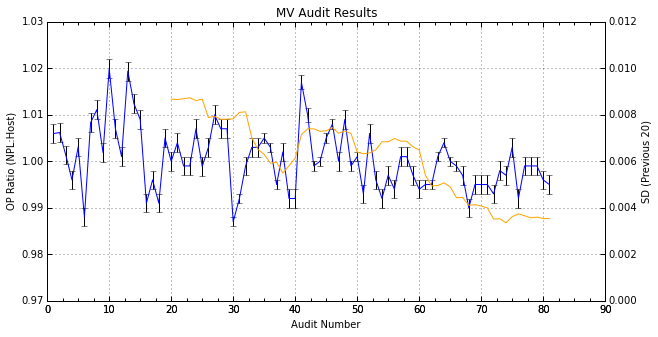

In [13]:
#m = mv_data_datesort

pylab.rcParams['figure.figsize'] = 10, 5 # change size of figures
fig1 = plt.figure()
axes1 = fig1.add_subplot(1,1,1)
plt.title('MV Audit Results')
plt.xlabel("Audit Number")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97, 1.03)
axes1.xaxis.set_minor_locator(AutoMinorLocator(4)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

x=np.arange(1,m['OPRatio'].count()+1)
y=m['OPRatio']
yerr=(m['OPError']*m['OPRatio'])/100

ysd=m['SD_Prev20']

plt.errorbar(x, y, yerr=yerr, ecolor='black')
axes2=fig1.add_subplot(111, sharex=axes1, frameon=False)
axes2.yaxis.tick_right()
axes2.yaxis.set_label_position('right')
plt.ylim(0, 0.012)
plt.ylabel("SD (Previous 20)")
line2=axes2.plot(x,ysd, color='orange')

#plt.savefig('NPL_Paper_Plots/NPL_kV_All_SD_NHS.png', bbox_inches='tight', dpi=300)

In [14]:
df3 = kv_data.copy()
df3.groupby('Region')
df3.mean()


Group               4.379310
Energy            154.448276
BeamQualRatio       0.999615
BeamQualError       2.384615
OPRatio             1.002103
OPError             0.606897
IntercompRatio      0.999792
IntercompError      0.400000
dtype: float64

Want to do the below with it split into groups, and also split into 5 year periods to see the variation with time. (Similar to Palmer paper...)

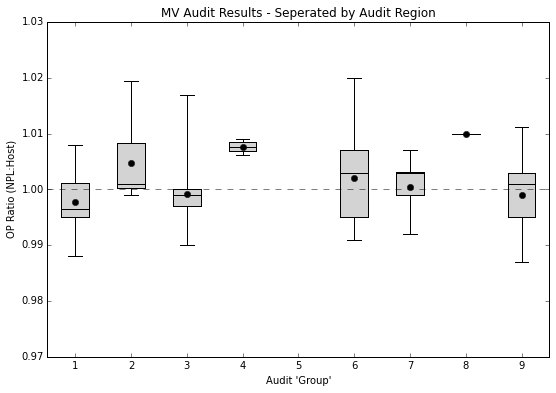

In [15]:
# extract only Groups and OPRatio to allow simple box plot production 
#mv = mv_data_datesort[['Group', 'OPRatio']]

# make a numpy array to use rather than pandas?
#g = np.array(mv_data_datesort['Group'])
#op = np.array(mv_data_datesort['OPRatio'])

#m = mv_data_datesort

g1 = m.loc[mv_data_datesort['Group']==1, ['OPRatio']]
g2 = m.loc[mv_data_datesort['Group']==2, ['OPRatio']]
g3 = m.loc[mv_data_datesort['Group']==3, ['OPRatio']]
g4 = m.loc[mv_data_datesort['Group']==4, ['OPRatio']]
g5 = m.loc[mv_data_datesort['Group']==5, ['OPRatio']]
g6 = m.loc[mv_data_datesort['Group']==6, ['OPRatio']]
g7 = m.loc[mv_data_datesort['Group']==7, ['OPRatio']]
g8 = m.loc[mv_data_datesort['Group']==8, ['OPRatio']]
g9 = m.loc[mv_data_datesort['Group']==9, ['OPRatio']]

grouped=[g1,g2,g3,g4,g5,g6,g7,g8,g9] # this should be able to be done a bit easier without splitting it all up first.

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)

bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)
plt.plot([-1,10],[1,1], linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1
plt.title('MV Audit Results - Seperated by Audit Region')
plt.xlabel("Audit 'Group'")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97,1.03)

for box in bp['boxes']:
    box.set(facecolor='lightgrey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/NPL_kV_All_Groups_NHS.png', bbox_inches='tight', dpi=300)


Plot all groups OP data as a sort of scatter plot (rather than use box plot?)

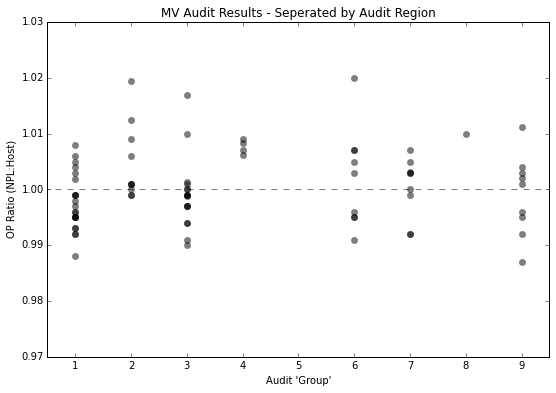

In [16]:
fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
ax.set_xticks([1,2,3,4,5,6,7,8,9])

one = plt.plot([0,10],[1,1], '--', color='black', alpha=0.5) #add line for OPratio=1

for i in range(0, len(grouped)):
    scat = plt.plot(np.linspace(i+1,i+1,len(grouped[i])), grouped[i], u'o', color='black', alpha=0.5, linewidth=2)

plt.xlim(0.5,9.5)
plt.ylim(0.97,1.03)
plt.title('MV Audit Results - Seperated by Audit Region')
plt.xlabel("Audit 'Group'")
plt.ylabel("OP Ratio (NPL:Host)")

##### can add box plot over the top by uncommenting the below line

#bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)

for box in bp['boxes']:
    box.set(facecolor='grey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/NPL_kV_All_Groups_Scat_NHS.png', bbox_inches='tight', dpi=300)

   #Split data into 2 year intervals

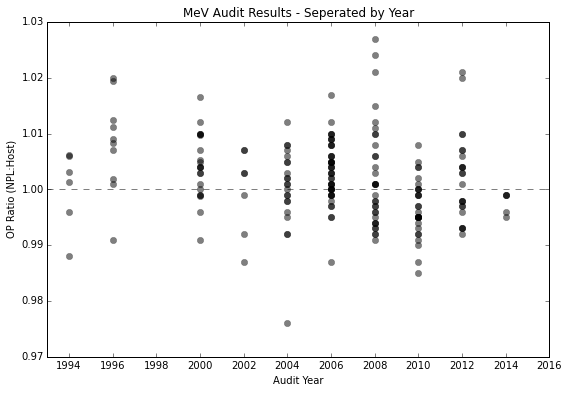

In [17]:
#create different sets of data containing 2 year intervals

d = nhs_data

y1 = d[(d['Date'] > '1994-01-01') & (d['Date'] < '1996-01-01')].copy()
y2 = d[(d['Date'] > '1996-01-01') & (d['Date'] < '1998-01-01')].copy()
y3 = d[(d['Date'] > '1998-01-01') & (d['Date'] < '2000-01-01')].copy()
y4 = d[(d['Date'] > '2000-01-01') & (d['Date'] < '2002-01-01')].copy()
y5 = d[(d['Date'] > '2002-01-01') & (d['Date'] < '2004-01-01')].copy()
y6 = d[(d['Date'] > '2004-01-01') & (d['Date'] < '2006-01-01')].copy()
y7 = d[(d['Date'] > '2006-01-01') & (d['Date'] < '2008-01-01')].copy()
y8 = d[(d['Date'] > '2008-01-01') & (d['Date'] < '2010-01-01')].copy()
y9 = d[(d['Date'] > '2010-01-01') & (d['Date'] < '2012-01-01')].copy()
y10 = d[(d['Date'] > '2012-01-01') & (d['Date'] < '2014-01-01')].copy()
y11 = d[(d['Date'] > '2014-01-01') & (d['Date'] < '2016-01-01')].copy()

#y1['GroupYear'] = 1
#y2['GroupYear'] = 2
#y3['GroupYear'] = 3
#y4['GroupYear'] = 4
#y5['GroupYear'] = 5
#y6['GroupYear'] = 6
#y7['GroupYear'] = 7
#y8['GroupYear'] = 8
#y9['GroupYear'] = 9
#y10['GroupYear'] = 10
#y11['GroupYear'] = 11

y1 = y1['OPRatio']
y2 = y2['OPRatio']
y3 = y3['OPRatio']
y4 = y4['OPRatio']
y5 = y5['OPRatio']
y6 = y6['OPRatio']
y7 = y7['OPRatio']
y8 = y8['OPRatio']
y9 = y9['OPRatio']
y10 = y10['OPRatio']
y11 = y11['OPRatio']

grouped_year=[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11] # this should be able to be done a bit easier without splitting it all up first.

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
#ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticks([1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016])

one = plt.plot([0,3000],[1,1], '--', color='black', alpha=0.5) #add line for OPratio=1

for i in range(0, len(grouped_year)):
    #print(i)
    scat = plt.plot(np.linspace(2*i+1994,2*i+1994,len(grouped_year[i])), grouped_year[i], u'o', color='black', alpha=0.5, linewidth=2)

#for i in range(0, len(grouped_year)):
#    print(np.linspace(i+1, i+1, len(grouped_year[i])))

#plt.xlim(0.5,11.5)
plt.xlim(1993, 2016)
plt.ylim(0.97,1.03)
plt.title('MeV Audit Results - Seperated by Year')
plt.xlabel("Audit Year")
plt.ylabel("OP Ratio (NPL:Host)")

#plt.savefig('NPL_Paper_Plots/NPL_kV_Years_Scat_NHS.png', bbox_inches='tight', dpi=300)


In [18]:
nhs_data.groupby('Type').describe()


BeamQualError  BeamQualRatio      Energy      Group  \
Type                                                              
MV   count   8.100000e+01      81.000000   81.000000  81.000000   
     mean    1.870370e-01       0.998920    8.629630   3.888889   
     std     2.204793e-02       0.005326    3.783003   2.765863   
     min     1.500000e-01       0.985000    4.000000   1.000000   
     25%     1.500000e-01       0.995000    6.000000   1.000000   
     50%     2.000000e-01       0.998700    6.000000   3.000000   
     75%     2.000000e-01       1.002000   10.000000   6.000000   
     max     2.000000e-01       1.012000   25.000000   9.000000   
MeV  count   2.400000e+01      61.000000   94.000000  94.000000   
     mean    2.000000e-01      -0.045410   11.436170   4.159574   
     std     2.197056e-09       0.081559    4.693987   2.974093   
     min     2.000000e-01      -0.280000    4.000000   1.000000   
     25%     2.000000e-01      -0.090000    8.000000   1.250000   
     50%     2.000000e-01      -0.050000   12.000000   3.000000   
     75%     2.000000e-01       0.000000   15.000000   7.000000   
     max     2.000000e-01       0.140000   22.000000   9.000000   
kV   count   2.600000e+01      26.000000   29.000000  29.000000   
     mean    2.384615e+00       0.999615  154.448276   4.379310   
     std     9.829313e-01       0.048669   82.535095   2.833647   
     min     2.000000e+00       0.873000   50.000000   1.000000   
     25%     2.000000e+00       0.982500   85.000000   2.000000   
     50%     2.000000e+00       1.002500  135.000000   3.000000   
     75%     2.000000e+00       1.023750  220.000000   7.000000   
     max     5.000000e+00       1.077000  300.000000   9.000000   

            IntercompError  IntercompRatio    OPError    OPRatio  
Type                                                              
MV   count    8.000000e+01       80.000000  81.000000  81.000000  
     mean     4.000000e-01        0.999049   0.177778   1.000463  
     std      1.161521e-08        0.007169   0.041079   0.006755  
     min      4.000000e-01        0.958000   0.100000   0.987000  
     25%      4.000000e-01        0.997000   0.200000   0.995000  
     50%      4.000000e-01        1.000000   0.200000   1.000000  
     75%      4.000000e-01        1.002250   0.200000   1.005000  
     max      4.000000e-01        1.010900   0.200000   1.019900  
MeV  count    6.700000e+01       67.000000  94.000000  94.000000  
     mean     4.000000e-01        1.000716   0.225532   1.002547  
     std      1.270775e-08        0.005178   0.084161   0.007437  
     min      4.000000e-01        0.987000   0.200000   0.985000  
     25%      4.000000e-01        0.997000   0.200000   0.998000  
     50%      4.000000e-01        1.001000   0.200000   1.002000  
     75%      4.000000e-01        1.005000   0.200000   1.007000  
     max      4.000000e-01        1.013000   0.500000   1.027000  
kV   count    2.400000e+01       24.000000  29.000000  29.000000  
     mean     4.000000e-01        0.999792   0.606897   1.002103  
     std      0.000000e+00        0.005150   0.037139   0.008793  
     min      4.000000e-01        0.992000   0.600000   0.976000  
     25%      4.000000e-01        0.995750   0.600000   0.998000  
     50%      4.000000e-01        1.000000   0.600000   1.003000  
     75%      4.000000e-01        1.002250   0.600000   1.006000  
     max      4.000000e-01        1.011000   0.800000   1.021000

##Split data into < 9MeV and >=9MeV

In [19]:
nhs_data.groupby('Energy').describe()

BeamQualError  BeamQualRatio      Group  IntercompError  \
Energy                                                                  
4      count       2.000000       4.000000   4.000000    4.000000e+00   
       mean        0.200000       0.230500   3.250000    4.000000e-01   
       std         0.000000       0.515391   2.629956    0.000000e+00   
       min         0.200000      -0.070000   1.000000    4.000000e-01   
       25%         0.200000      -0.032500   1.750000    4.000000e-01   
       50%         0.200000      -0.005000   2.500000    4.000000e-01   
       75%         0.200000       0.258000   4.000000    4.000000e-01   
       max         0.200000       1.002000   7.000000    4.000000e-01   
5      count       1.000000       1.000000   1.000000    1.000000e+00   
       mean        0.200000       0.993900   4.000000    4.000000e-01   
       std              NaN            NaN        NaN             NaN   
       min         0.200000       0.993900   4.000000    4.000000e-01   
       25%         0.200000       0.993900   4.000000    4.000000e-01   
       50%         0.200000       0.993900   4.000000    4.000000e-01   
       75%         0.200000       0.993900   4.000000    4.000000e-01   
       max         0.200000       0.993900   4.000000    4.000000e-01   
6      count      46.000000      53.000000  61.000000    5.200000e+01   
       mean        0.189130       0.764796   3.967213    4.000000e-01   
       std         0.020851       0.438290   2.845858    1.180348e-08   
       min         0.150000      -0.190000   1.000000    4.000000e-01   
       25%         0.200000       0.992000   1.000000    4.000000e-01   
       50%         0.200000       0.997000   3.000000    4.000000e-01   
       75%         0.200000       1.000000   7.000000    4.000000e-01   
       max         0.200000       1.012000   9.000000    4.000000e-01   
8      count       4.000000       7.000000   7.000000    7.000000e+00   
       mean        0.200000       0.537935   4.285714    4.000000e-01   
       std         0.000000       0.569798   2.360387    6.083374e-09   
       min         0.200000      -0.110000   2.000000    4.000000e-01   
       25%         0.200000      -0.050000   2.500000    4.000000e-01   
       50%         0.200000       0.985000   3.000000    4.000000e-01   
...                     ...            ...        ...             ...   
225    std              NaN            NaN        NaN             NaN   
       min         5.000000       1.000000   8.000000             NaN   
       25%         5.000000       1.000000   8.000000             NaN   
       50%         5.000000       1.000000   8.000000             NaN   
       75%         5.000000       1.000000   8.000000             NaN   
       max         5.000000       1.000000   8.000000             NaN   
250    count       1.000000       1.000000   1.000000    1.000000e+00   
       mean        5.000000       1.020000   6.000000    4.000000e-01   
       std              NaN            NaN        NaN             NaN   
       min         5.000000       1.020000   6.000000    4.000000e-01   
       25%         5.000000       1.020000   6.000000    4.000000e-01   
       50%         5.000000       1.020000   6.000000    4.000000e-01   
       75%         5.000000       1.020000   6.000000    4.000000e-01   
       max         5.000000       1.020000   6.000000    4.000000e-01   
260    count       1.000000       1.000000   1.000000    1.000000e+00   
       mean        2.000000       0.972000   9.000000    4.000000e-01   
       std              NaN            NaN        NaN             NaN   
       min         2.000000       0.972000   9.000000    4.000000e-01   
       25%         2.000000       0.972000   9.000000    4.000000e-01   
       50%         2.000000       0.972000   9.000000    4.000000e-01   
       75%         2.000000       0.972000   9.000000    4.000000e-01   
       max         2.000000       0.972000   9.000000    4.000000e-01   

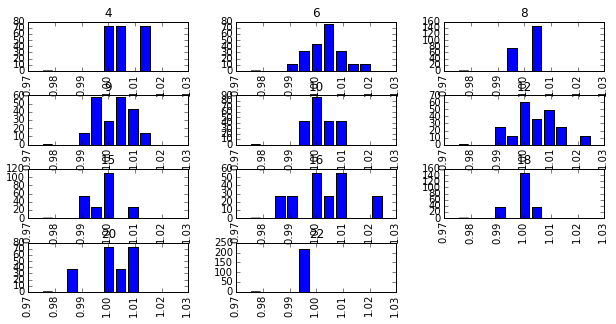

In [26]:
# plot grouped by MeV energy

mev_data['OPRatio'].hist(by=mev_data['Energy'], normed=True, bins=11, range=(0.975,1.025), rwidth=0.8) #simple auto plot in a grid

mev_data.groupby('Energy')


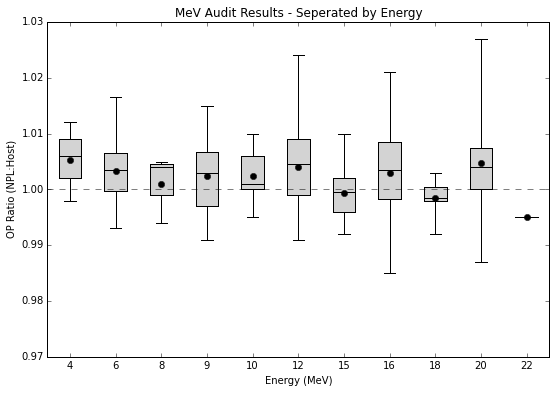

In [46]:
m = mev_data

e1 = m.loc[m['Energy']==4, ['OPRatio']]
e2 = m.loc[m['Energy']==6, ['OPRatio']]
e3 = m.loc[m['Energy']==8, ['OPRatio']]
e4 = m.loc[m['Energy']==9, ['OPRatio']]
e5 = m.loc[m['Energy']==10, ['OPRatio']]
e6 = m.loc[m['Energy']==12, ['OPRatio']]
e7 = m.loc[m['Energy']==15, ['OPRatio']]
e8 = m.loc[m['Energy']==16, ['OPRatio']]
e9 = m.loc[m['Energy']==18, ['OPRatio']]
e10 = m.loc[m['Energy']==20, ['OPRatio']]
e11 = m.loc[m['Energy']==22, ['OPRatio']]

grouped=[e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11] # this should be able to be done a bit easier without splitting it all up first.

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
#labels = list('ABCDEFGHIJK')
labels = ['4','6','8','9','10','12','15','16','18','20','22']


bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True, labels=labels)
plt.plot([-1,20],[1,1], linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1
plt.title('MeV Audit Results - Seperated by Energy')
plt.xlabel("Energy (MeV)")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97,1.03)

#ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11], ['4','6','8','9','10','12','15','16','18','20','22'])

for box in bp['boxes']:
    box.set(facecolor='lightgrey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/NPL_kV_All_Groups_NHS.png', bbox_inches='tight', dpi=300)

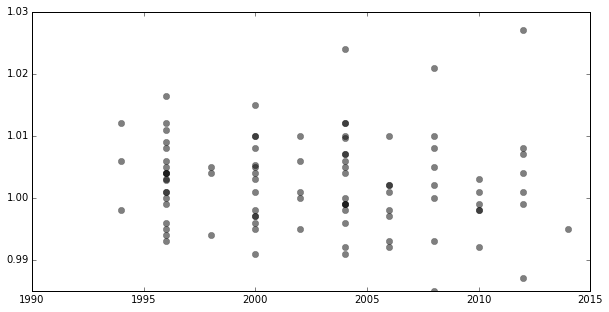

In [47]:
for i in range(0, len(grouped)):
    #print(i)
    scat = plt.plot(np.linspace(2*i+1994,2*i+1994,len(grouped[i])), grouped[i], u'o', color='black', alpha=0.5, linewidth=2)

